# 贸易战影分析数据可视化

In [1]:
import os

from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import *
os.environ["PYSPARK_PYTHON"]="/Users/sunlu/anaconda2/envs/python36/bin/python3.6" #在Mac中使用

In [4]:
spark = SparkSession\
        .builder\
        .appName("check country")\
        .getOrCreate()

In [5]:
# Loading data from a JDBC source
url = "jdbc:mysql://localhost:3306/gongdan?useUnicode=true&characterEncoding=UTF-8&user=root&password=root"
# table = "country_data_import"
table = "country_data_export"
type_i_e = table.split("_")[2]
if type_i_e == "import":
    type_i_e = "进口"
else:
    if type_i_e == "export":
        type_i_e = "出口"
ds = spark.read.jdbc(url=url,table=table)\
    .withColumn("MONTH", col("MONTH").cast("int"))
ds.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- TIME: string (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- USD: string (nullable = true)
 |-- RMB: string (nullable = true)
 |-- ANALYSIS_TIME: string (nullable = true)
 |-- ANALYST: string (nullable = true)
 |-- DELETE_TAG: string (nullable = true)
 |-- DELETE_TIME: string (nullable = true)
 |-- REMARKS: string (nullable = true)



In [6]:
ds.groupBy("COUNTRY","TIME","YEAR","MONTH").agg({"USD": "sum", "RMB": "sum"})\
    .filter(col("COUNTRY") == "美国").orderBy(col("TIME").asc())\
    .withColumn("RMB",bround(col("sum(RMB)").cast("float") / 100000000.0, 3))\
    .withColumn("USD",bround(col("sum(USD)").cast("float") / 100000000.0, 3))\
    .orderBy(col("USD").desc()).show()

+-------+------+----+-----+---------------+-------------+-------+------+
|COUNTRY|  TIME|YEAR|MONTH|       sum(RMB)|     sum(USD)|    RMB|   USD|
+-------+------+----+-----+---------------+-------------+-------+------+
|   美国|201511|2015|   11|1.9389277397E10|3.052724335E9|193.893|30.527|
|   美国|201809|2018|    9|1.9856211542E10|2.901134122E9|198.562|29.011|
|   美国|201808|2018|    8| 1.818803461E10|2.726556282E9| 181.88|27.266|
|   美国|201512|2015|   12|1.7276279524E10|2.711057131E9|172.763|27.111|
|   美国|201807|2018|    7|1.7462015683E10|2.704257086E9| 174.62|27.043|
|   美国|201811|2018|   11|1.8413270636E10|2.667538782E9|184.133|26.675|
|   美国|201712|2017|   12|1.6921572559E10|2.555969806E9|169.216| 25.56|
|   美国|201710|2017|   10|1.6634060315E10|2.519586264E9|166.341|25.196|
|   美国|201810|2018|   10|1.7015257216E10|2.479664227E9|170.153|24.797|
|   美国|201806|2018|    6|1.5326597642E10|2.408782454E9|153.266|24.088|
|   美国|201801|2018|    1|1.5883599849E10|  2.4038255E9|158.836|24.038|


In [73]:
# 中国每月向各国出口金额，金额是亿元
country = "委内瑞拉"
ds1 = ds.groupBy("COUNTRY","TIME","YEAR","MONTH").agg({"USD": "sum", "RMB": "sum"})\
    .filter(col("COUNTRY") == country).orderBy(col("TIME").asc())\
    .withColumn("RMB",bround(col("sum(RMB)").cast("float") / 100000000.0, 3))\
    .withColumn("USD",bround(col("sum(USD)").cast("float") / 100000000.0, 3))

In [75]:
ds1.show(truncate=False)

+--------+------+----+-----+------------+------------+-----+-----+
|COUNTRY |TIME  |YEAR|MONTH|sum(RMB)    |sum(USD)    |RMB  |USD  |
+--------+------+----+-----+------------+------------+-----+-----+
|委内瑞拉|201501|2015|1    |4.80071851E8|7.8484887E7 |4.801|0.785|
|委内瑞拉|201502|2015|2    |5.39674408E8|8.8027649E7 |5.397|0.88 |
|委内瑞拉|201503|2015|3    |6.755937E7  |1.1015708E7 |0.676|0.11 |
|委内瑞拉|201504|2015|4    |1.47119811E8|2.3970541E7 |1.471|0.24 |
|委内瑞拉|201505|2015|5    |8.942957E7  |1.4579323E7 |0.894|0.146|
|委内瑞拉|201506|2015|6    |2.8054076E8 |4.5883747E7 |2.805|0.459|
|委内瑞拉|201507|2015|7    |1.95799492E8|3.2009365E7 |1.958|0.32 |
|委内瑞拉|201508|2015|8    |931895.0    |152389.0    |0.009|0.002|
|委内瑞拉|201509|2015|9    |5.21193565E8|8.1491161E7 |5.212|0.815|
|委内瑞拉|201510|2015|10   |3.1827286E7 |5003281.0   |0.318|0.05 |
|委内瑞拉|201511|2015|11   |3.6635527E7 |5771828.0   |0.366|0.058|
|委内瑞拉|201512|2015|12   |9.6716769E7 |1.5175818E7 |0.967|0.152|
|委内瑞拉|201601|2016|1    |1.21682889E8|1.8890

In [77]:
x = list(ds1.rdd.map(lambda x:x.TIME).collect())
y1 = ds1.rdd.map(lambda x:x.USD).collect()
y2 = ds1.rdd.map(lambda x:x.RMB).collect()

<Figure size 720x360 with 0 Axes>

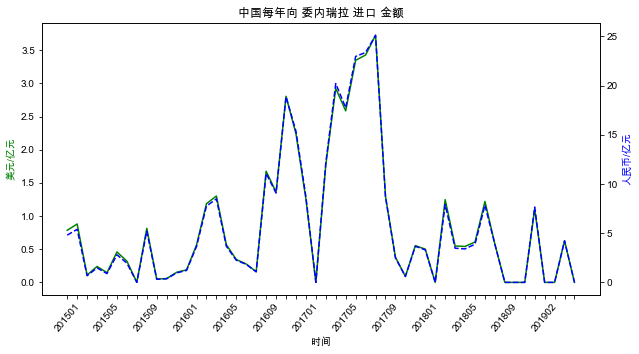

In [78]:
import matplotlib.pyplot as plt
fig = plt.figure()

# 设置figure_size尺寸
plt.rcParams['figure.figsize'] = (10.0, 5.0)

"""
解决标题乱码
https://blog.csdn.net/qq_21904665/article/details/78732696
"""
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题


fig,ax1 = plt.subplots()
ax2 = ax1.twinx()           # 做镜像处理
ax1.plot(x,y1,'g-',label = '美元/亿元')
ax2.plot(x,y2,'b--', label = '人民币/亿元')

ax1.set_title(u"中国每年向 %s %s 金额"  %(country,type_i_e))
ax1.set_xlabel(u'时间')    #设置x轴标题
ax1.set_ylabel(u'美元/亿元',color = 'g')   #设置Y1轴标题
ax2.set_ylabel(u'人民币/亿元',color = 'b')   #设置Y2轴标题

# X轴倾斜
for xtick in ax1.get_xticklabels():
    xtick.set_rotation(50)

""" 
x轴标签过于密集的解决方法
https://blog.csdn.net/funnyPython/article/details/83925573
"""
for label in ax1.get_xticklabels():
    label.set_visible(False)
for label in ax1.get_xticklabels()[::4]:
    label.set_visible(True)

plt.show()

<Figure size 720x360 with 0 Axes>

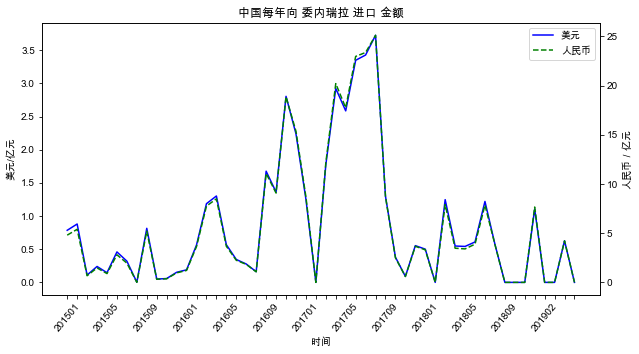

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure()

# 设置figure_size尺寸
plt.rcParams['figure.figsize'] = (10.0, 5.0)

"""
解决标题乱码
https://blog.csdn.net/qq_21904665/article/details/78732696
"""
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x,y1, 'b-', label = '美元')

ax2 = ax1.twinx()
ax2.plot(x,y2, 'g--', label = '人民币')

# 增加图例
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

ax1.set_title(u"中国每年向 %s %s 金额"  %(country,type_i_e))
ax1.set_xlabel("时间")
ax1.set_ylabel(r"美元/亿元")
ax2.set_ylabel(r"人民币／亿元")

# X轴倾斜
for xtick in ax1.get_xticklabels():
    xtick.set_rotation(50)

""" 
x轴标签过于密集的解决方法
https://blog.csdn.net/funnyPython/article/details/83925573
"""
for label in ax1.get_xticklabels():
    label.set_visible(False)
for label in ax1.get_xticklabels()[::4]:
    label.set_visible(True)

plt.show()